In [12]:
import sys
sys.path.insert(0, '/yunity/arusty/PF-GAP')

#Import libraries, MDS from SKlearn, and all the custom files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from Pipeline.functions import *


#Data
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions


#Functions
from QGAP.qgap import QGAP
from Redcomets.Redcomets import REDCOMETS
from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket
from RDST.rdst import RDST_GAP

In [13]:
static_data = pd.read_csv("/yunity/arusty/PF-GAP/data/sp500_fundamentals_combined.csv")
time_series = pd.read_csv("/yunity/arusty/PF-GAP/data/sp500_daily_returns_since_2022.csv")

static_data.head()

,Ticker,Year,PE Ratio,PB Ratio,PS Ratio,ROE,ROA,Debt/Equity,Current Ratio,Profit Margin,Revenue Growth YoY,EPS Growth Next 5Y,Market Cap
0,MMM,2024,17.295145,16.742617,3.04910,1.086153,0.104670,312.492,1.657,0.169807,-0.010,0.221,74742579200
1,MMM,2023,17.295145,16.742617,3.04910,-1.455170,-0.138296,312.492,1.657,-0.284234,-0.010,0.221,74742579200
2,MMM,2022,17.295145,16.742617,3.04910,0.392406,0.124357,312.492,1.657,0.220825,-0.010,0.221,74742579200
3,AOS,2024,17.988981,5.003449,2.45474,0.283302,0.164691,12.132,1.552,0.139755,-0.077,-0.181,9372443648
4,AOS,2023,17.988981,5.003449,2.45474,0.301778,0.173185,12.132,1.552,0.144466,-0.077,-0.181,9372443648


In [14]:
# drop row with index 0 and reset index
time_series = time_series.drop(0).reset_index(drop=True)

# show the first few rows
time_series.head()

,Date,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,2022-01-04,0.014010,0.016633,-0.023518,-0.001920,-0.007146,-0.018374,-0.038738,0.002871,0.032779,...,0.009057,0.013160,-0.040422,-0.003190,0.006329,0.010608,0.005347,0.006337,0.010145,-0.038072
1,2022-01-05,-0.004106,-0.016714,-0.004493,0.005253,-0.017611,-0.071426,-0.057264,-0.045808,-0.001662,...,0.002244,-0.006955,-0.018968,-0.037033,0.009800,-0.013629,-0.012677,-0.050068,-0.003297,-0.038024
2,2022-01-06,-0.008301,0.006703,-0.000148,-0.004711,-0.048290,-0.000603,0.000588,-0.003858,0.018475,...,0.023880,-0.011265,0.009546,0.004629,-0.007822,-0.001373,0.010330,-0.005410,-0.008307,0.003971
3,2022-01-07,0.010955,-0.011296,0.003108,-0.002588,-0.019180,-0.006652,-0.031050,-0.006024,0.015852,...,0.020773,-0.011863,-0.001556,-0.001063,0.008759,-0.007992,-0.011466,-0.043771,-0.006050,-0.029114
4,2022-01-10,-0.014115,-0.003127,-0.002213,0.011195,0.006069,0.029626,0.000000,-0.006061,0.012066,...,-0.002142,0.004578,0.008272,-0.028149,0.010999,-0.010136,-0.013964,0.008571,-0.009754,0.007153


In [15]:
#time_series.dropna(inplace=True)

In [16]:
# Split static_data into separate DataFrames by year
for year in static_data['Year'].unique():
    globals()[f"static{year}"] = static_data[static_data['Year'] == year].reset_index(drop=True)
    print(f"static{year} DataFrame created with {len(globals()[f'static{year}'])} rows.")


static2024 DataFrame created with 500 rows.
static2023 DataFrame created with 501 rows.
static2022 DataFrame created with 501 rows.
static2025 DataFrame created with 21 rows.


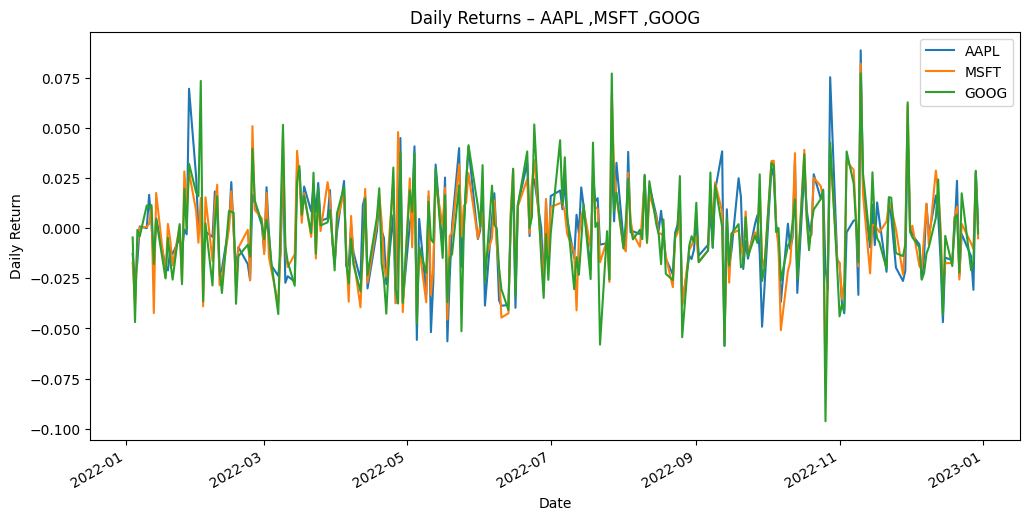

In [17]:
# Visualize a couple ticker time series
def plot_ticker_returns(tickers, start_date=None, end_date=None):
    # prepare a datetime‐indexed copy of the time_series
    df = time_series.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    data = df[tickers]
    if start_date or end_date:
        data = data.loc[start_date:end_date]
    data.plot(figsize=(12, 6))
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.title(f"Daily Returns – {' ,'.join(tickers)}")
    plt.legend()
    plt.show()

plot_ticker_returns(['AAPL', 'MSFT', 'GOOG'], start_date='2022-01-01', end_date='2022-12-31')

# Creating the Proximities

In [ ]:
time_series = time_series.drop(columns=['Date'])
time_series.T.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
629,-0.013947,-0.004071,-0.004700,0.009188,-0.004708,-0.016302,-0.008898,-0.009524,0.004632,-0.005156,...,0.000944,-0.009240,-0.015229,-0.005748,0.006909,-0.003506,-0.010005,0.002417,-0.005922,-0.006783
630,0.019862,0.027994,0.013873,0.000536,-0.008790,-0.002597,0.038735,0.013575,0.014393,0.013156,...,0.002595,0.003187,-0.000045,-0.010028,0.002287,0.020585,0.019817,0.027186,0.010779,-0.004304
631,0.015344,0.037233,0.010965,0.010527,0.013055,-0.012258,-0.010981,0.040736,0.024498,0.029511,...,0.004000,0.014797,0.016720,0.008342,0.028332,0.011222,0.002710,0.013928,0.012067,0.024497
632,0.007846,0.020330,0.000384,0.002178,0.042418,0.002546,-0.001814,0.012869,0.002380,0.010778,...,0.007265,0.008512,0.014153,0.014419,0.003698,0.003989,0.013820,-0.009533,0.004622,0.007314
633,-0.012687,-0.000342,-0.006849,-0.004149,0.023307,0.011913,-0.009801,-0.100053,0.007880,-0.009226,...,-0.009772,-0.003331,0.010651,-0.014331,-0.019344,-0.008091,-0.026045,0.007104,-0.019873,-0.005920


In [19]:
from QGAP.qgap import QGAP
qgap = QGAP(matrix_type="dense")
data_to_proximities(qgap, time_series, None, None, None, None)

Error in fit_model:  This ExtraTreesClassifier estimator requires y to be passed, but the target y is None.


TypeError: Check the arguments passed into the function. The model may not be able to be fit with the given data.